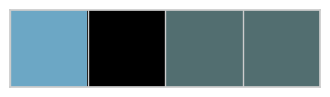

In [72]:
# Pacotes de preparação dos dados
import numpy as np
import pandas as pd
import calendar
from datetime import datetime
# Pacotes gráficos
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Palette Seting
palette = ['#6CA7C5', '#000000', '#526E70', '#526E70']
palette2 = ['#214737', '#083313']

sns.set_palette(sns.color_palette(palette))
sns.palplot(sns.color_palette(palette))
import warnings
warnings.filterwarnings("ignore")

In [73]:
dados = pd.read_excel('Test_analista3.xlsx')


In [74]:
dados.head()

,CPF_Vendedor,Nome_Vendedor,Data_da_Venda,Prazo,Tipo_Contrato,Modelo,Status,Cliente,Município,Parcela,Valor_Moto,Data_da_Contemplação,Tipo_de_Contemplação,Proposta,Vl_total_amortizado,Vl_Quitação,Plano,Seguro_de_Vida
0,4045440260,Gabigol,2024-06-28,12,N,*POP 110I,BORDERÔ FORMADO,Thiago Santos,MIRADOR,1102.31,10887,NaT,NaN,31848133,0.00,10887.00,#voudeHonda,Não
1,2040058000,Vegeta,2024-06-14,12,N,*TITAN160 EX,AGUARDANDO FORMACAO,Xavier Ferreira,BALSAS,2064.77,18817,NaT,NaN,31484787,1568.08,17248.91,#voudeHonda+,Sim
2,64480040055,Zezin,2024-06-18,12,N,*POP 110I,AGUARDANDO FORMACAO,Kleber Rocha,RIACHAO,1106.13,10887,NaT,NaN,31747871,907.25,9979.74,#voudeHonda,Sim
3,644468048,Mozart,2024-06-08,12,N,*POP 110I,NORMAL,Vitor Barbosa,FEIRA NOVA DO MARANHAO,1106.12,10887,NaT,NaN,47717678,1280.39,12167.39,#voudeHonda,Sim
4,60800888088,Tião,2024-06-25,12,N,*BIZ 125,AGUARDANDO FORMACAO,Rafael Monteiro,PASTOS BONS,1650.27,16299,NaT,NaN,48839667,1358.24,14940.75,#voudeHonda,Não


In [75]:
prazo_mais_vendido = dados['Prazo'].value_counts().idxmax()
print(f"O prazo que mais vende é: {prazo_mais_vendido} meses")

O prazo que mais vende é: 36 meses


In [76]:
pop110_vendas = dados[dados['Modelo'] == '*POP 110I']

cidade_mais_pop110 = pop110_vendas['Município'].value_counts().idxmax()
print(f"A cidade com maior participação na venda de Pop110 é: {cidade_mais_pop110}")


A cidade com maior participação na venda de Pop110 é: BALSAS


In [77]:
# Ranking de vendas por vendedor
ranking_vendas_vendedor = dados['Nome_Vendedor'].value_counts().reset_index()
ranking_vendas_vendedor.columns = ['Nome_Vendedor', 'Total_Vendas']
print("Ranking de vendas por vendedor:")
ranking_vendas_vendedor.head(25)


Ranking de vendas por vendedor:


,Nome_Vendedor,Total_Vendas
0,Frajola,425
1,Mozart,392
2,Vegeta,346
3,Tião,333
4,Zezin,332
5,Neymar Jr.,325
6,Constantino,317
7,L. de Pedreiro,305
8,M. Gomes,303
9,Fred,297


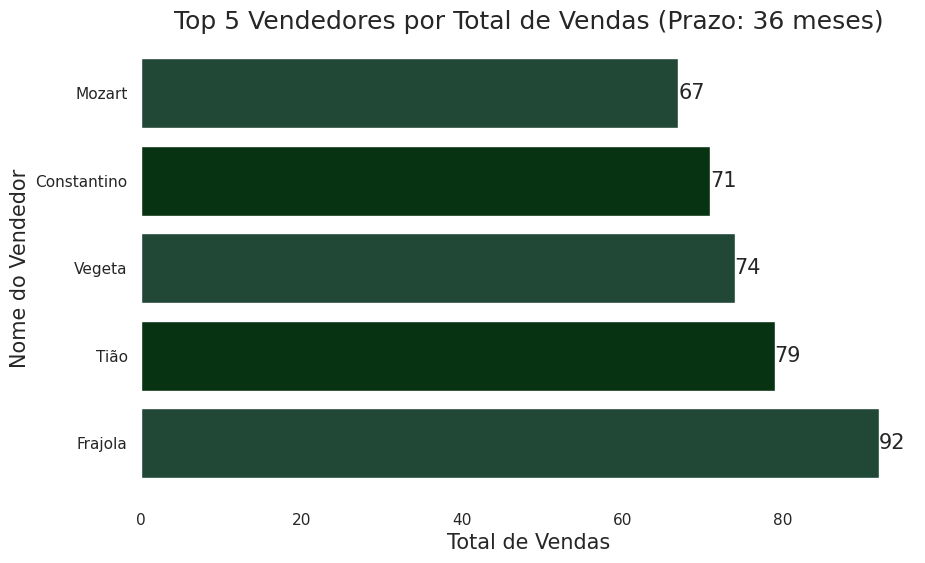

In [78]:
# Filtrar vendas com prazo de 36 meses
df_36 = dados[dados['Prazo'] == 36]

# Contagem de vendas por vendedor
vendas_por_vendedor_36 = df_36['Nome_Vendedor'].value_counts().head(5).reset_index()
vendas_por_vendedor_36.columns = ['Nome_Vendedor', 'Total_Vendas']

# Plotar gráfico de barras horizontal
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(vendas_por_vendedor_36['Nome_Vendedor'], vendas_por_vendedor_36['Total_Vendas'], color=palette2)
for index, value in enumerate(vendas_por_vendedor_36['Total_Vendas']):
    ax.text(value, index, str(value), va='center', fontsize=15)

# Customização do gráfico
ax.set_xlabel('Total de Vendas', fontsize=15)
ax.set_ylabel('Nome do Vendedor', fontsize=15)
ax.set_title('Top 5 Vendedores por Total de Vendas (Prazo: 36 meses)', fontsize=18)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.grid(False)

plt.show()

In [79]:

ranking_vendas_vendedor_36 = df_36['Nome_Vendedor'].value_counts().reset_index()
ranking_vendas_vendedor_36.columns = ['Nome_Vendedor', 'Total_Vendas']
ranking_vendas_vendedor_36['Ranking'] = ranking_vendas_vendedor_36['Total_Vendas'].rank(method='min', ascending=False).astype(int)

ranking_vendas_vendedor_36 = ranking_vendas_vendedor_36.sort_values(by='Ranking')

print("Ranking de vendas por vendedor (prazo 36 meses):")
ranking_vendas_vendedor_36.head(100)

Ranking de vendas por vendedor (prazo 36 meses):


,Nome_Vendedor,Total_Vendas,Ranking
0,Frajola,92,1
1,Tião,79,2
2,Vegeta,74,3
3,Constantino,71,4
4,Mozart,67,5
5,L. de Pedreiro,65,6
6,M. Gomes,60,7
7,Fred,58,8
8,Zezin,55,9
9,O Grande,54,10


In [80]:
# Histórico de vendas do vendedor "M. Gomes"
vendas_m_gomes = dados[dados['Nome_Vendedor'] == 'M. Gomes']

# Total de vendas
total_vendas = vendas_m_gomes.shape[0]

# Moto mais vendida
moto_mais_vendida = vendas_m_gomes['Modelo'].value_counts().idxmax()

# Plano mais vendido
plano_mais_vendido = vendas_m_gomes['Plano'].value_counts().idxmax()

print(f"Histórico de vendas do vendedor 'M. Gomes':\n")
print(f"Total de vendas: {total_vendas}")
print(f"Moto mais vendida: {moto_mais_vendida}")
print(f"Plano mais vendido: {plano_mais_vendido}")


Histórico de vendas do vendedor 'M. Gomes':

Total de vendas: 303
Moto mais vendida: BROS160ESDD
Plano mais vendido: #voudeHonda


In [81]:
# Top 3 vendedores
top3_vendedores = dados['Nome_Vendedor'].value_counts().head(3).index
caracteristicas_top3 = dados[dados['Nome_Vendedor'].isin(top3_vendedores)]

# Características dos top 3 vendedores
caracteristicas = caracteristicas_top3.groupby('Nome_Vendedor').agg({
    'Modelo': lambda x: x.value_counts().idxmax(),
    'Tipo_Contrato': lambda x: x.value_counts().idxmax(),
    'Plano': lambda x: x.value_counts().idxmax()
}).reset_index()

print("Características dos top 3 vendedores:")
caracteristicas.head()


Características dos top 3 vendedores:


,Nome_Vendedor,Modelo,Tipo_Contrato,Plano
0,Frajola,CB 250F,N,#voudeHonda
1,Mozart,BROS160ESDD,R,#voudeHonda
2,Vegeta,START 160,N,#voudeHonda


Percentual de vendas por quinzena:
   Quinzena  Percentual
0      07-1    3.200000
1      07-2    3.216667
2      08-1    3.283333
3      08-2    3.600000
4      09-1    3.316667
5      09-2    3.416667
6      10-1    3.300000
7      10-2    3.216667
8      11-1    6.600000
9      11-2    6.583333
10     12-1    6.533333
11     12-2    6.500000
12     01-1    3.383333
13     01-2    3.833333
14     02-1    3.250000
15     02-2    3.083333
16     03-1    3.583333
17     03-2    3.633333
18     04-1    2.850000
19     04-2    3.450000
20     05-1    3.033333
21     05-2    3.250000
22     06-1    7.083333
23     06-2    6.800000


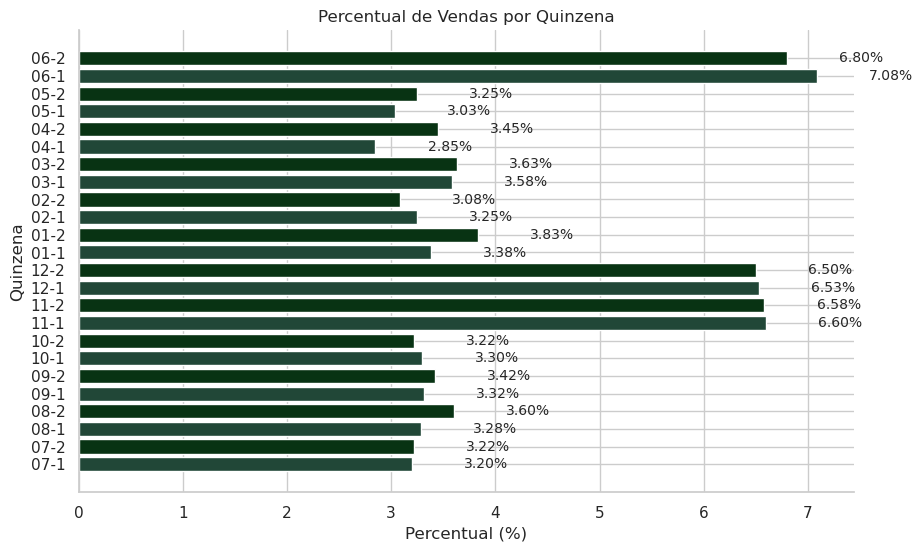

In [82]:
# Criar coluna de quinzena ordenada para facilitar a ordenação cronológica
dados['Quinzena_Ordenada'] = pd.to_datetime(dados['Data_da_Venda']).apply(lambda x: f"{x.year}-{x.month:02d}-{1 if x.day <= 15 else 2}")

# % de vendas por quinzena ordenado cronologicamente
vendas_por_quinzena = dados['Quinzena_Ordenada'].value_counts(normalize=True).sort_index() * 100

# Criar um dataframe para melhor visualização
vendas_por_quinzena_df = vendas_por_quinzena.reset_index()
vendas_por_quinzena_df.columns = ['Quinzena_Ordenada', 'Percentual']

# Adicionar coluna de quinzena legível
vendas_por_quinzena_df['Quinzena'] = vendas_por_quinzena_df['Quinzena_Ordenada'].apply(lambda x: f"{x.split('-')[1]}-{x.split('-')[2]}")

# Ordenar o dataframe pela coluna Quinzena_Ordenada
vendas_por_quinzena_df = vendas_por_quinzena_df.sort_values(by='Quinzena_Ordenada')

# Imprimir a tabela de percentual de vendas por quinzena
print("Percentual de vendas por quinzena:")
print(vendas_por_quinzena_df[['Quinzena', 'Percentual']])

# Plotar gráfico de barras horizontal
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(vendas_por_quinzena_df['Quinzena'], vendas_por_quinzena_df['Percentual'], color=palette2)
ax.set_xlabel('Percentual (%)')
ax.set_ylabel('Quinzena')
ax.set_title('Percentual de Vendas por Quinzena')

# Remover os eixos direito e de cima
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for index, value in enumerate(vendas_por_quinzena_df['Percentual']):
    ax.text(value + 0.5, index, f'{value:.2f}%', va='center', fontsize=10)

plt.show()

Top 3 vendedores do plano 'Conquista':
  Nome_Vendedor  Total_Vendas
0       Frajola           197
1        Mozart           166
2          Tião           164


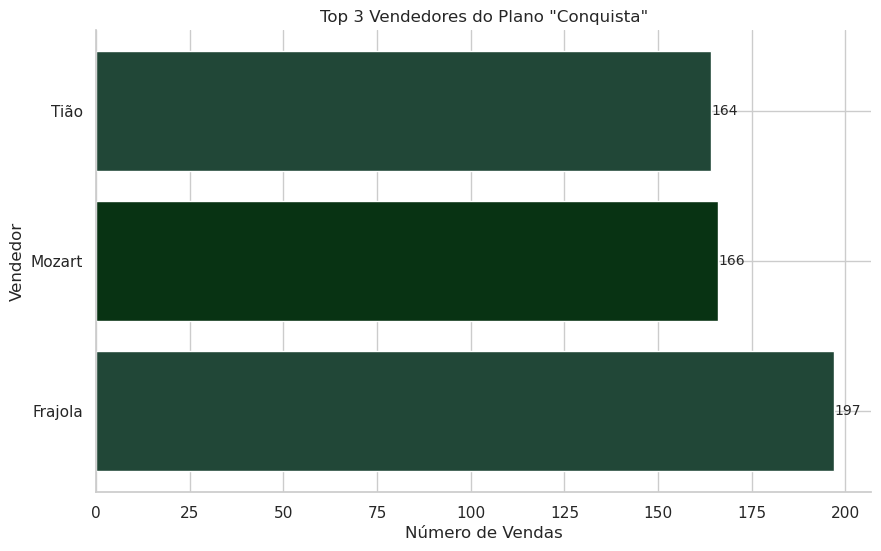

In [83]:
# Filtrar vendas do plano 'Conquista'
vendas_conquista = dados[dados['Plano'] == 'Conquista']

# Top 3 vendedores do plano 'Conquista' com número de vendas
top3_vendedores_conquista = vendas_conquista['Nome_Vendedor'].value_counts().head(3).reset_index()
top3_vendedores_conquista.columns = ['Nome_Vendedor', 'Total_Vendas']

# Imprimir o resultado
print("Top 3 vendedores do plano 'Conquista':")
print(top3_vendedores_conquista)

# Plotar gráfico de barras horizontal
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(top3_vendedores_conquista['Nome_Vendedor'], top3_vendedores_conquista['Total_Vendas'], color=palette2)
ax.set_xlabel('Número de Vendas')
ax.set_ylabel('Vendedor')
ax.set_title('Top 3 Vendedores do Plano "Conquista"')

# Remover os eixos de cima e do lado direito
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

for index, value in enumerate(top3_vendedores_conquista['Total_Vendas']):
    ax.text(value + 0.1, index, f'{value}', va='center', fontsize=10)

plt.show()

In [84]:
# Filtrar vendas do vendedor "Tião" em Balsas
vendas_tiao_balsas = dados[(dados['Nome_Vendedor'] == 'Tião') & (dados['Município'] == 'BALSAS')]

# Participação percentual das vendas com seguro
participacao_seguro_tiao_balsas = (vendas_tiao_balsas['Seguro_de_Vida'] == 'Sim').mean() * 100
print(f"A participação percentual das vendas com seguro do vendedor Tião em Balsas é: {participacao_seguro_tiao_balsas:.2f}%")


A participação percentual das vendas com seguro do vendedor Tião em Balsas é: 49.12%


In [85]:
# Filtrar vendas em Balsas, contratos do tipo "N" e prazos maiores (60, 72 e 80 meses)
vendas_balsas_n_maiores = dados[(dados['Município'] == 'BALSAS') & (dados['Tipo_Contrato'] == 'N') & (dados['Prazo'].isin([60, 72, 80]))]

# Encontrar o vendedor mais atuante
vendedor_mais_atuante_balsas_n_maiores = vendas_balsas_n_maiores['Nome_Vendedor'].value_counts().idxmax()
print(f"O vendedor mais atuante em Balsas vendendo contratos do tipo 'N' em prazos maiores é: {vendedor_mais_atuante_balsas_n_maiores}")


O vendedor mais atuante em Balsas vendendo contratos do tipo 'N' em prazos maiores é: Vegeta


Distribuição das vendas de junho de 2024 por status:
Status
NORMAL                  35.414166
PRE-CONTEMPLADO         22.689076
NORMAL                  18.367347
AGUARDANDO FORMACAO     12.364946
BORDERÔ FORMADO          6.002401
PRE-CONTEMPLADO          4.201681
CONTEMPLADO              0.840336
CANCELADO                0.120048
Name: proportion, dtype: float64


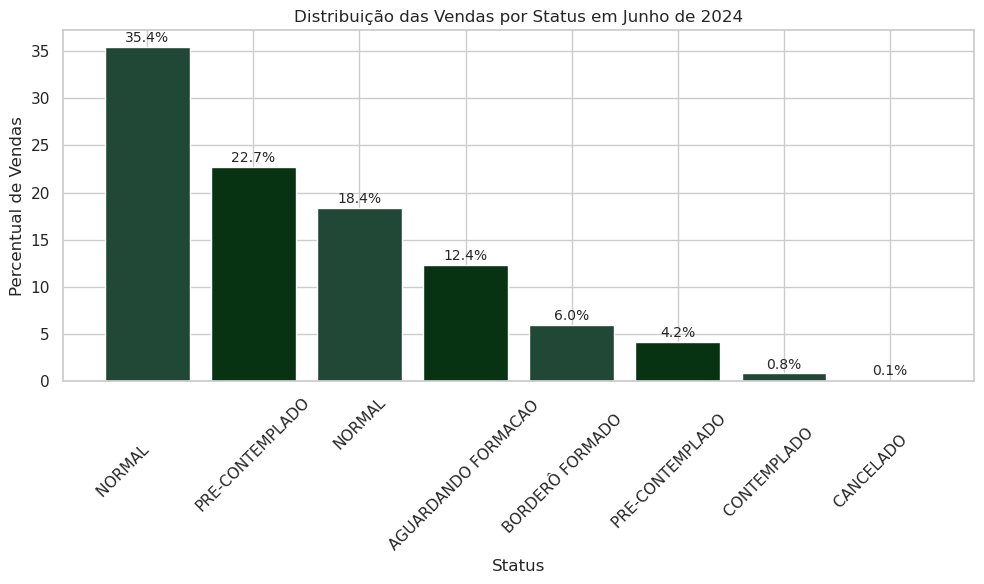

In [86]:
# Filtrar vendas de junho de 2024
vendas_junho_2024 = dados[pd.to_datetime(dados['Data_da_Venda']).dt.to_period('M') == pd.Period('2024-06')]

# Distribuição das vendas por status
distribuicao_status_junho_2024 = vendas_junho_2024['Status'].value_counts(normalize=True) * 100
print("Distribuição das vendas de junho de 2024 por status:")
print(distribuicao_status_junho_2024)

# Plotar gráfico de barras vertical
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(distribuicao_status_junho_2024.index, distribuicao_status_junho_2024.values, color=palette2)
ax.set_ylabel('Percentual de Vendas')
ax.set_xlabel('Status')
ax.set_title('Distribuição das Vendas por Status em Junho de 2024')
for index, value in enumerate(distribuicao_status_junho_2024.values):
    ax.text(index, value + 0.5, f'{value:.1f}%', ha='center', fontsize=10)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [88]:

# Dados fornecidos
data = {
    "INDICADORES": [
        "Meta Venda", "SSI", "CEC", "Cotas CNH", "Canc. CNH", 
        "Share BH", "Seguros", "Prog. de Excelência", "Perf. FIDC", "Perf. AEF"
    ],
    "Pontos Possíveis": [25, 10, 15, 5, 5, 7, 3, 15, 9, 6],
    "Pontos Ganhos": [20, 10, 15, 5, 5, 5, 1, 15, 9, 6],
    "Pontos Deixados": [5, 0, 0, 0, 0, 2, 2, 0, 0, 0]
}

# Criar o DataFrame
df = pd.DataFrame(data)

# Adicionar a linha de total
df.loc[len(df.index)] = ["Total", sum(data["Pontos Possíveis"]), sum(data["Pontos Ganhos"]), sum(data["Pontos Deixados"])]

# Exibir o DataFrame
print(df)


            INDICADORES  Pontos Possíveis  Pontos Ganhos  Pontos Deixados
0            Meta Venda                25             20                5
1                   SSI                10             10                0
2                   CEC                15             15                0
3             Cotas CNH                 5              5                0
4             Canc. CNH                 5              5                0
5              Share BH                 7              5                2
6               Seguros                 3              1                2
7   Prog. de Excelência                15             15                0
8            Perf. FIDC                 9              9                0
9             Perf. AEF                 6              6                0
10                Total               100             91                9


In [ ]:
#6CA7C5', '#000000', '#526E70', '#526E70

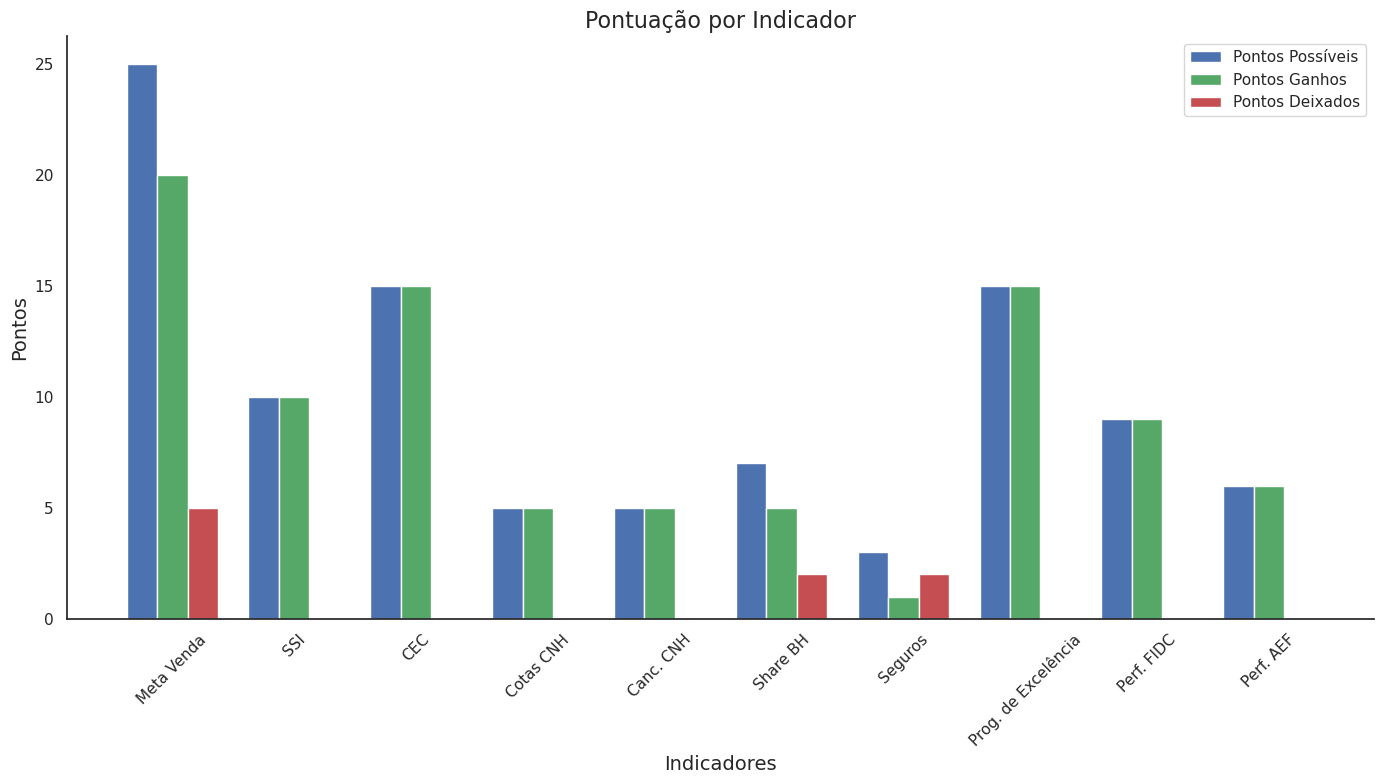

In [95]:
# Adicionar a linha de total
df.loc[len(df.index)] = ["Total", sum(data["Pontos Possíveis"]), sum(data["Pontos Ganhos"]), sum(data["Pontos Deixados"])]

# Remover a linha "Total" do gráfico
df_sem_total = df[df['INDICADORES'] != 'Total']

# Configurações do gráfico
plt.figure(figsize=(14, 8))
sns.set(style="white")

# Gráfico de barras
bar_width = 0.25
index = range(len(df_sem_total['INDICADORES']))

bar1 = plt.bar(index, df_sem_total['Pontos Possíveis'], bar_width, label='Pontos Possíveis', color='b')
bar2 = plt.bar([i + bar_width for i in index], df_sem_total['Pontos Ganhos'], bar_width, label='Pontos Ganhos', color='g')
bar3 = plt.bar([i + bar_width*2 for i in index], df_sem_total['Pontos Deixados'], bar_width, label='Pontos Deixados', color='r')

# Labels e títulos
plt.xlabel('Indicadores', fontsize=14)
plt.ylabel('Pontos', fontsize=14)
plt.title('Pontuação por Indicador', fontsize=16)
plt.xticks([i + bar_width for i in index], df_sem_total['INDICADORES'], rotation=45)
plt.legend()

# Remover grid de fundo e eixos de cima e do lado direito
sns.despine()

# Exibir o gráfico
plt.tight_layout()
plt.show()